In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql import SparkSession

#create spark seesion object
spark = SparkSession.builder.appName('IPL_Data_Analysis').getOrCreate()

In [0]:
''' it looks like all of our dataset files schemas needs to be defined since there're some columns types that are not recognized,
 so let's define our schema for all the dataframes in our dataset one by one  '''

from pyspark.sql.types import StructType, StructField, IntegerType, DecimalType, StringType, BooleanType, DateType
from pyspark.sql.functions import col, when, sum, avg, row_number, count  # Import functions for transformation 
from pyspark.sql.window import Window   # to work with window functions

In [0]:
# First, Ball by Ball scehma:

Ball_by_Ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

# Now you can use this schema to create a DataFrame or apply it while loading a DataFrame
# For example:
# df = spark.read.csv("path_to_csv_file", schema=schema_to_match)

In [0]:
# Read ball by ball.csv from AWS S3 Bucket and match it to the above defined schema
Ball_by_Ball_df = spark.read.format('csv').option('header', 'true').load("s3://ipl-dataset-till-2017/Ball_By_Ball.csv", schema=Ball_by_Ball_schema)

In [0]:
# Match_ schema
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])

In [0]:
# Read Match.csv from AWS S3 Bucket and match it to the above defined schema
match_df = spark.read.format('csv').option('header', 'true').load("s3://ipl-dataset-till-2017/Match.csv", schema=match_schema)

In [0]:
# Player scehma
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])

In [0]:
# Read player.csv from AWS S3 Bucket and match it to the above defined schema
player_df = spark.read.format('csv').option('header', 'true').load("s3://ipl-dataset-till-2017/Player.csv", schema=player_schema)

In [0]:
# Player_match_schema
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])


In [0]:
# Read player_match.csv from AWS S3 Bucket and match it to the above defined schema
player_match_df = spark.read.format('csv').option('header', 'true').load("s3://ipl-dataset-till-2017/Player_match.csv", schema=player_match_schema)

In [0]:
# team_schema
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])

In [0]:
# Read team.csv from AWS S3 Bucket and match it to the above defined schema
team_df = spark.read.format('csv').option('header', 'true').load("s3://ipl-dataset-till-2017/Team.csv", schema=team_schema)

In [0]:
# ------------------------------------------------------ball_by_ball.csv analysis----------------------------------------------------------

# filter to include valid deliveries only(excluding wides and no balls for specific analysis)
Ball_by_Ball_df = Ball_by_Ball_df.filter((col("wides") == 0) & (col("noballs") == 0))

# Aggragation: Getting the total and average runs scored in each match and each inning
Total_and_avg_runs = Ball_by_Ball_df.groupBy("match_id", "innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
)

In [0]:
# window functions: Claculate the running total runs for each match and each inning ordered by over_id
windowSpec = Window.partitionBy("match_id", "innings_no").orderBy("over_id")

Ball_by_Ball_df = Ball_by_Ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)
)

In [0]:
#conditional column: Highlight high impact balls (either a wicket or more than 6 runs scored including extras)
Ball_by_Ball_df = Ball_by_Ball_df.withColumn(
    "high_impact",
    when((col("runs_scored") + col("extra_runs") > 6) | (col("bowler_wicket") == True), True).otherwise(False)
)

In [0]:
Ball_by_Ball_df.show(3)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:
# --------------------------------------------------------match.csv analysis----------------------------------------------------------------


from pyspark.sql.functions import dayofmonth, month, year   # to work with date datatype

# Extracting the day, month and year for each match played for more in-depth time-based analysis
match_df = match_df.withColumn("day", dayofmonth("match_date"))
match_df = match_df.withColumn("month", month("match_date"))
match_df = match_df.withColumn("year", year("match_date"))

# win margin categorizing (high, medium, low)
match_df = match_df.withColumn(
    "win_margin_category",
    when((col("win_margin") >= 100), "high")
    .when((col("win_margin") < 100) & (col("win_margin") >= 50), "medium")
    .otherwise("low")
)

# coin toss impact on match winner
match_df = match_df.withColumn(
    "toss_match_winner",
    when((col("toss_winner") == col("match_winner")), "Yes").otherwise("No")
)

# show the final ouptput dataframe
match_df.show(2)




+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id| day|month|year|win_margin_category|toss_match_winner|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       I

In [0]:
# --------------------------------------------------------player.csv analysis----------------------------------------------------------------

from pyspark.sql.functions import lower, regexp_replace

# normalizing and cleaning players names
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]", "")))

# setting null values of "batting_hand" and "bowling_skill" to "unknown"
player_df = player_df.na.fill({"batting_hand" : "unknown", "bowling_skill" : "unknown"})

# categorizing players based on batting hand
player_df = player_df.withColumn(
    "batting_style",
    when((col("batting_hand").contains("Right")), "Right-handed").otherwise("Left-handed")
)

# showing final enhanced df
player_df.show(5)

+---------+---------+---------------+----+--------------+------------------+------------+-------------+
|player_sk|player_id|    player_name| dob|  batting_hand|     bowling_skill|country_name|batting_style|
+---------+---------+---------------+----+--------------+------------------+------------+-------------+
|        0|        1|     sc ganguly|null| Left-hand bat|  Right-arm medium|       India|  Left-handed|
|        1|        2|    bb mccullum|null|Right-hand bat|  Right-arm medium| New Zealand| Right-handed|
|        2|        3|     rt ponting|null|Right-hand bat|  Right-arm medium|   Australia| Right-handed|
|        3|        4|      dj hussey|null|Right-hand bat|Right-arm offbreak|   Australia| Right-handed|
|        4|        5|mohammad hafeez|null|Right-hand bat|Right-arm offbreak|    Pakistan| Right-handed|
+---------+---------+---------------+----+--------------+------------------+------------+-------------+
only showing top 5 rows



In [0]:
# -----------------------------------------------------player_match.csv analysis------------------------------------------------------------
from pyspark.sql.functions import current_date

# Add veteran status of the players based on their age
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when((col("age_as_on_match") >= 35), "Veteran").otherwise("Non-Veteran")
)

# adding a dynamic column to calculate the years since debut for a player in a match
player_match_df = player_match_df.withColumn(
    "years_since_debut",
    (year(current_date()) - col("season_year"))
)

# displaying the enhanced df
player_match_df.show(2)

+---------------+---------------+--------+---------+-----------+----+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|     bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+-----------+----+--------------+------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+-----------

In [0]:
# Getting number of players from each country in the IPL
players_number_per_country = player_match_df.groupBy("country_name").count()

players_number_per_country.show()

+------------+-----+
|country_name|count|
+------------+-----+
| Afghanistan|   17|
|   Sri Lanka|  570|
|   Zimbabwea|    4|
|        null|    1|
|       India| 9045|
| West Indies|  689|
|  Bangladesh|   63|
| New Zealand|  465|
|     England|  243|
|   Australia| 1648|
|South Africa| 1113|
|    Pakistan|  106|
| Netherlands|   29|
+------------+-----+



In [0]:
# ------------------------------------------------------------SQL Analytics-----------------------------------------------------------------
Ball_by_Ball_df.createOrReplaceTempView("ball_by_ball")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
match_df.createOrReplaceTempView("match")
team_df.createOrReplaceTempView("team")

In [0]:
# Getiing the most games played by players in IPL
most_games_played = spark.sql("""
SELECT player_name,
count("player_name") AS number_of_games
FROM player_match
GROUP BY player_name
ORDER BY number_of_games DESC

""")

# displaying the result
most_games_played.show(10)

+---------------+---------------+
|    player_name|number_of_games|
+---------------+---------------+
|       SK Raina|            160|
|      RG Sharma|            159|
|       MS Dhoni|            158|
|     KD Karthik|            152|
|      YK Pathan|            149|
|     RV Uthappa|            149|
|      G Gambhir|            148|
|        V Kohli|            148|
|      RA Jadeja|            137|
|Harbhajan Singh|            136|
+---------------+---------------+
only showing top 10 rows



In [0]:
# Getting the top scoring batsman till 2017 of course
top_scoring_batsman__till_2017 = spark.sql("""
SELECT 
pm.player_name,
sum(b.runs_scored) AS total_runs
FROM ball_by_ball b
JOIN match m ON m.match_id = b.match_id
JOIN player_match pm ON pm.match_id = m.match_id AND b.striker = pm.player_id
JOIN player p ON p.player_id = b.striker
GROUP BY pm.player_name
ORDER BY total_runs DESC
""")

# displaying the result
top_scoring_batsman__till_2017.show(5)

+-----------+----------+
|player_name|total_runs|
+-----------+----------+
|   SK Raina|      4526|
|    V Kohli|      4402|
|  RG Sharma|      4184|
|  G Gambhir|      4112|
|  DA Warner|      3985|
+-----------+----------+
only showing top 5 rows



In [0]:
# Getting the most match wins by team
Top_match_winning_team = spark.sql("""
SELECT 
match_winner AS team_name,
COUNT(match_winner) AS games_won
FROM match
GROUP BY team_name
HAVING team_name IS NOT NULL
ORDER BY games_won DESC
LIMIT 5
""")

# displaying results
Top_match_winning_team.show(10)

+--------------------+---------+
|           team_name|games_won|
+--------------------+---------+
|      Mumbai Indians|       91|
| Chennai Super Kings|       79|
|Kolkata Knight Ri...|       77|
|Royal Challengers...|       73|
|     Kings XI Punjab|       70|
+--------------------+---------+



In [0]:
import matplotlib.pyplot as plt

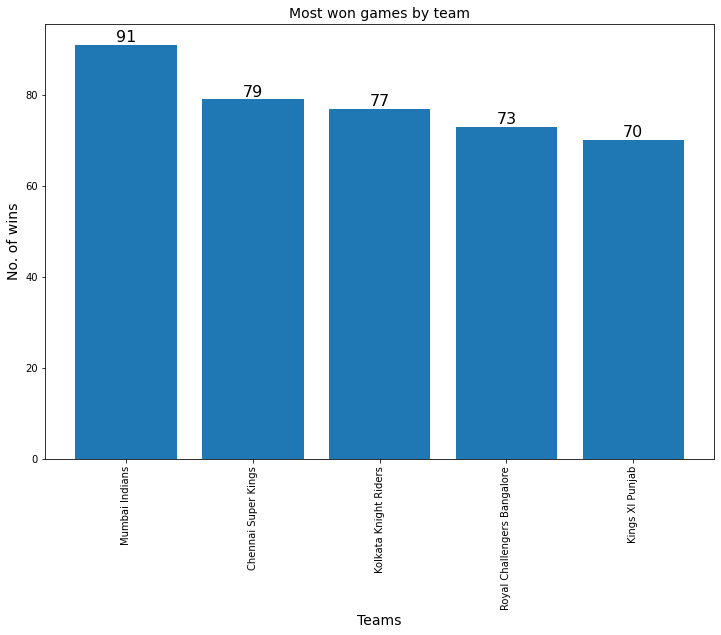

In [0]:
# conerting sql results to a pandas dataframe for visualization
most_won_games = Top_match_winning_team.toPandas() 

# determine plot size
plt.figure(figsize=(12, 8))

# create the bar chart
bars = plt.bar(most_won_games["team_name"], most_won_games["games_won"])

#adding labels and title
plt.xlabel("Teams", fontsize=14)
plt.ylabel("No. of wins", fontsize=14)
plt.title("Most won games by team", fontsize=14)

# rotate xlabel vertically
plt.xticks(rotation='vertical')

# Add values on top of the bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), 
             str(int(bar.get_height())), ha='center', va='bottom', fontsize=16)

#displaying the plot
plt.show()


In [0]:
toss_impact_matches = spark.sql("""
SELECT match_id, toss_name, toss_winner, match_winner,
CASE WHEN toss_winner = match_winner THEN "Won" ELSE "Lost" END AS 
FROM match
WHERE toss_name IS NOT NULL
ORDER BY match_id
""")

toss_impact_matches.show()

+--------+---------+--------------------+--------------------+-------------------+
|match_id|toss_name|         toss_winner|        match_winner|toss_winner_outcome|
+--------+---------+--------------------+--------------------+-------------------+
|  335987|    field|Royal Challengers...|Kolkata Knight Ri...|               Lost|
|  335988|      bat| Chennai Super Kings| Chennai Super Kings|                Won|
|  335989|      bat|    Rajasthan Royals|    Delhi Daredevils|               Lost|
|  335990|      bat|      Mumbai Indians|Royal Challengers...|               Lost|
|  335991|      bat|     Deccan Chargers|Kolkata Knight Ri...|               Lost|
|  335992|      bat|     Kings XI Punjab|    Rajasthan Royals|               Lost|
|  335993|      bat|     Deccan Chargers|    Delhi Daredevils|               Lost|
|  335994|    field|      Mumbai Indians| Chennai Super Kings|               Lost|
|  335995|    field|    Rajasthan Royals|    Rajasthan Royals|                Won|
|  3

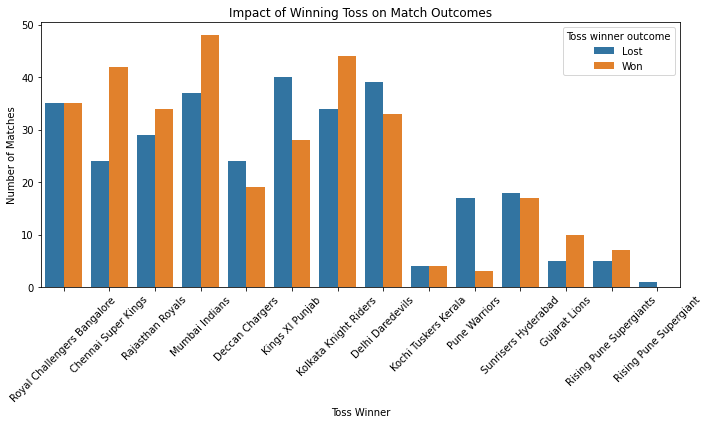

In [0]:
import seaborn as sns

# converting sql result to pandas df for visualiztions
toss_impact = toss_impact_matches.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='toss_winner_outcome', data=toss_impact)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Toss winner outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
# Getting average runs scored in a match for each venue
scores_per_venue = spark.sql("""
SELECT venue_name, int(avg(total_runs)) AS average_runs
FROM(
    SELECT b.match_id, m.venue_name , SUM(b.runs_scored) AS total_runs
    FROM ball_by_ball b 
    JOIN match m ON m.match_id = b.match_id
    GROUP BY b.match_id, m.venue_name
    ORDER BY b.match_id
)
GROUP BY venue_name
ORDER BY average_runs DESC
""")

scores_per_venue.show()

+--------------------+------------+
|          venue_name|average_runs|
+--------------------+------------+
|   Brabourne Stadium|         325|
|Saurashtra Cricke...|         319|
|Punjab Cricket As...|         317|
|    Barabati Stadium|         311|
|          Green Park|         308|
|Rajiv Gandhi Inte...|         302|
|Maharashtra Crick...|         302|
|Himachal Pradesh ...|         301|
|MA Chidambaram St...|         299|
|Sardar Patel Stad...|         298|
|Punjab Cricket As...|         296|
|Punjab Cricket As...|         296|
|Holkar Cricket St...|         296|
|    Wankhede Stadium|         296|
|M Chinnaswamy Sta...|         292|
|    Feroz Shah Kotla|         290|
|Sharjah Cricket S...|         286|
|De Beers Diamond ...|         285|
|Rajiv Gandhi Inte...|         284|
|     SuperSport Park|         284|
+--------------------+------------+
only showing top 20 rows



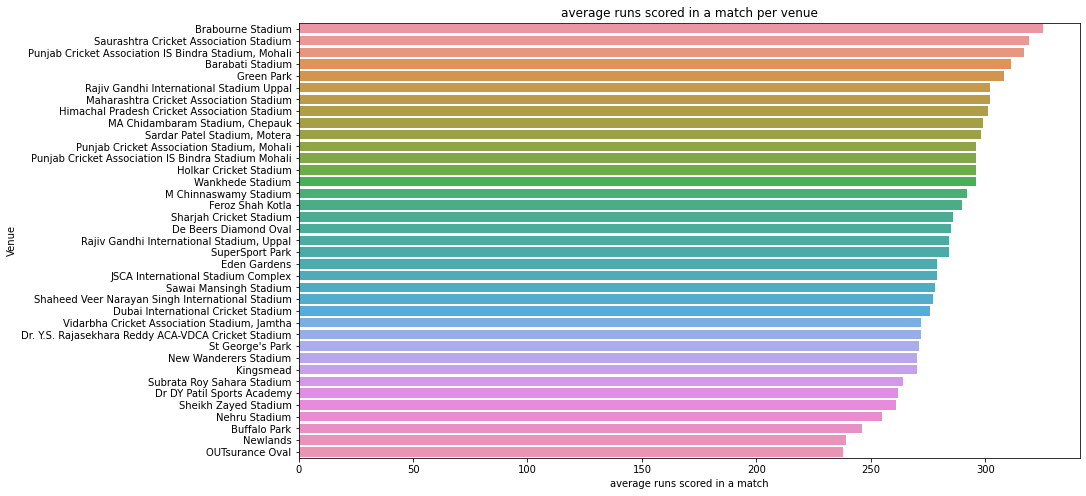

In [0]:
# converting sql result to pandas df for visualiztions
Average_runs_scored_per_venue = scores_per_venue.toPandas()

# plot
plt.figure(figsize=(14, 8))
sns.barplot(x="average_runs", y="venue_name", data=Average_runs_scored_per_venue)
plt.xlabel("average runs scored in a match")
plt.ylabel("Venue")
plt.title("average runs scored in a match per venue")

# results
plt.show()

In [0]:
# getting the count of dismasal types (how the player get out)
out_types = spark.sql("""
SELECT out_type, count(*) AS No_of_event
FROM ball_by_ball
WHERE out_type IS NOT NULL
GROUP BY out_type
ORDER BY No_of_event DESC
""")

out_types.show()

+--------------------+-----------+
|            out_type|No_of_event|
+--------------------+-----------+
|      Not Applicable|     137852|
|              caught|       3678|
|              bowled|       1382|
|             run out|        744|
|        Keeper Catch|        695|
|                 lbw|        455|
|             stumped|        222|
|   caught and bowled|        211|
|          hit wicket|          9|
|        retired hurt|          9|
|obstructing the f...|          1|
+--------------------+-----------+



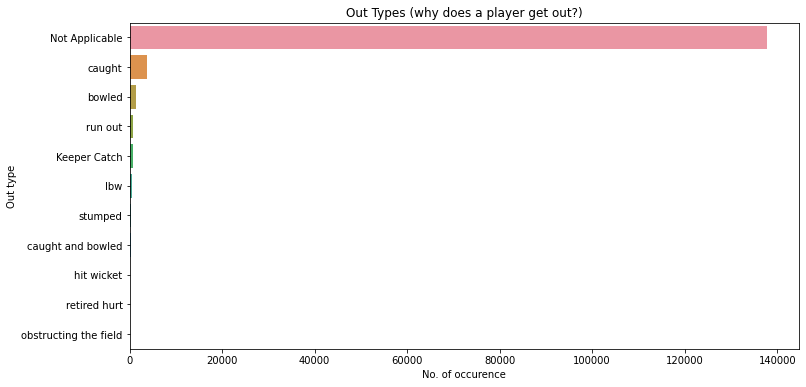

In [0]:
# convert sql result to a pandas datframe
out_types_df = out_types.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="No_of_event", y="out_type", data=out_types_df)
plt.title("Out Types (why does a player get out?)")
plt.xlabel("No. of occurence")
plt.ylabel("Out type")

# results
plt.show()

In [0]:
# teams performance after winning the toss
toss_winner_performance = spark.sql("""
SELECT team1 AS team, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS toss_and_match_winner
FROM match
WHERE team1 = toss_winner
GROUP BY team1
ORDER BY toss_and_match_winner DESC
""")

toss_winner_performance.show()

+--------------------+--------------+---------------------+
|                team|matches_played|toss_and_match_winner|
+--------------------+--------------+---------------------+
| Chennai Super Kings|            37|                   27|
|      Mumbai Indians|            42|                   26|
|Kolkata Knight Ri...|            36|                   24|
|Royal Challengers...|            34|                   19|
|    Delhi Daredevils|            36|                   17|
|    Rajasthan Royals|            25|                   16|
|     Kings XI Punjab|            32|                   14|
| Sunrisers Hyderabad|            16|                    8|
|     Deccan Chargers|            22|                    6|
|Rising Pune Super...|             6|                    4|
|       Gujarat Lions|             7|                    3|
|Kochi Tuskers Kerala|             4|                    2|
|       Pune Warriors|            10|                    2|
+--------------------+--------------+---

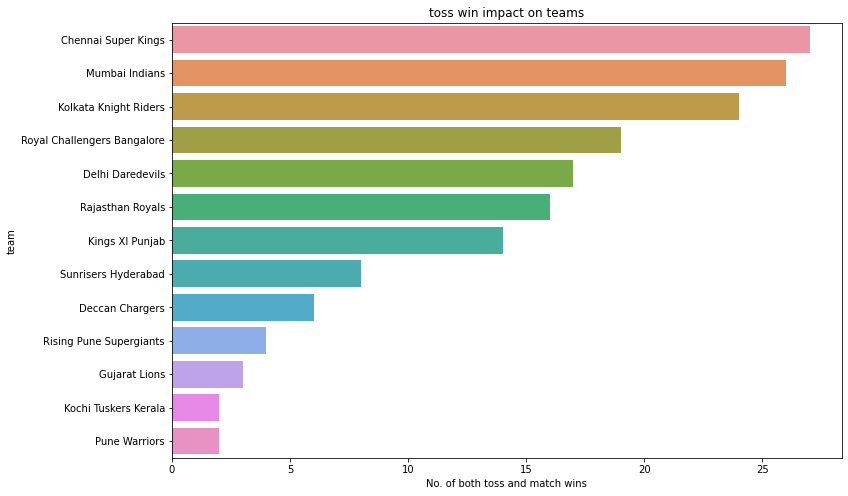

In [0]:
# sql result to a pandas df
team_result = toss_winner_performance.toPandas()

# plot
plt.figure(figsize=(12, 8))
sns.barplot(x="toss_and_match_winner", y="team", data=team_result)
plt.title("toss win impact on teams")
plt.xlabel("No. of both toss and match wins")
plt.ylabel("team")

# results display
plt.show()